In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


two_coupled_fhn_get_params (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
I0 = -1.7071205330241375; U0 = 0.26506094791239404
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.421422866701183, 0.7359215519694303, 0.43895581827508423] # SA[8.054797242493304, 0.7437113804461553, 0.4383355523705589];

3-element Vector{Float64}:
 8.421422866701183
 0.7359215519694303
 0.43895581827508423

In [6]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26506094791239404, 0.305, 0.3, -1.7071205330241375]
 time:          0.0
 state:         [8.421422866701183, 0.7359215519694303, 0.43895581827508423]


In [35]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [45]:
sol_for[100]

3-element Vector{Float64}:
 8.409425028190013
 0.7364230818880007
 0.43860221040552305

In [7]:
u0holy = [7.743460321577969, 0.74491695803711, 0.43755241233903247]

3-element Vector{Float64}:
 7.743460321577969
 0.74491695803711
 0.43755241233903247

In [8]:
prob_for = ODEProblem(TM, u0holy, (0.0, 1000), p)
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001, maxiters = 2e6); 

In [ ]:
idx, idy, idz = 2, 3, 1
az = 1.1pi;
ts, tf = 960000, 985000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!(type = "svg", antialias = :best)

f = Figure(resolution = (1100, 900))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 2.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 50, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

display(f)

In [19]:
#save("chaotic_homoclinic_phase.eps", f)

CairoMakie.Screen{EPS}


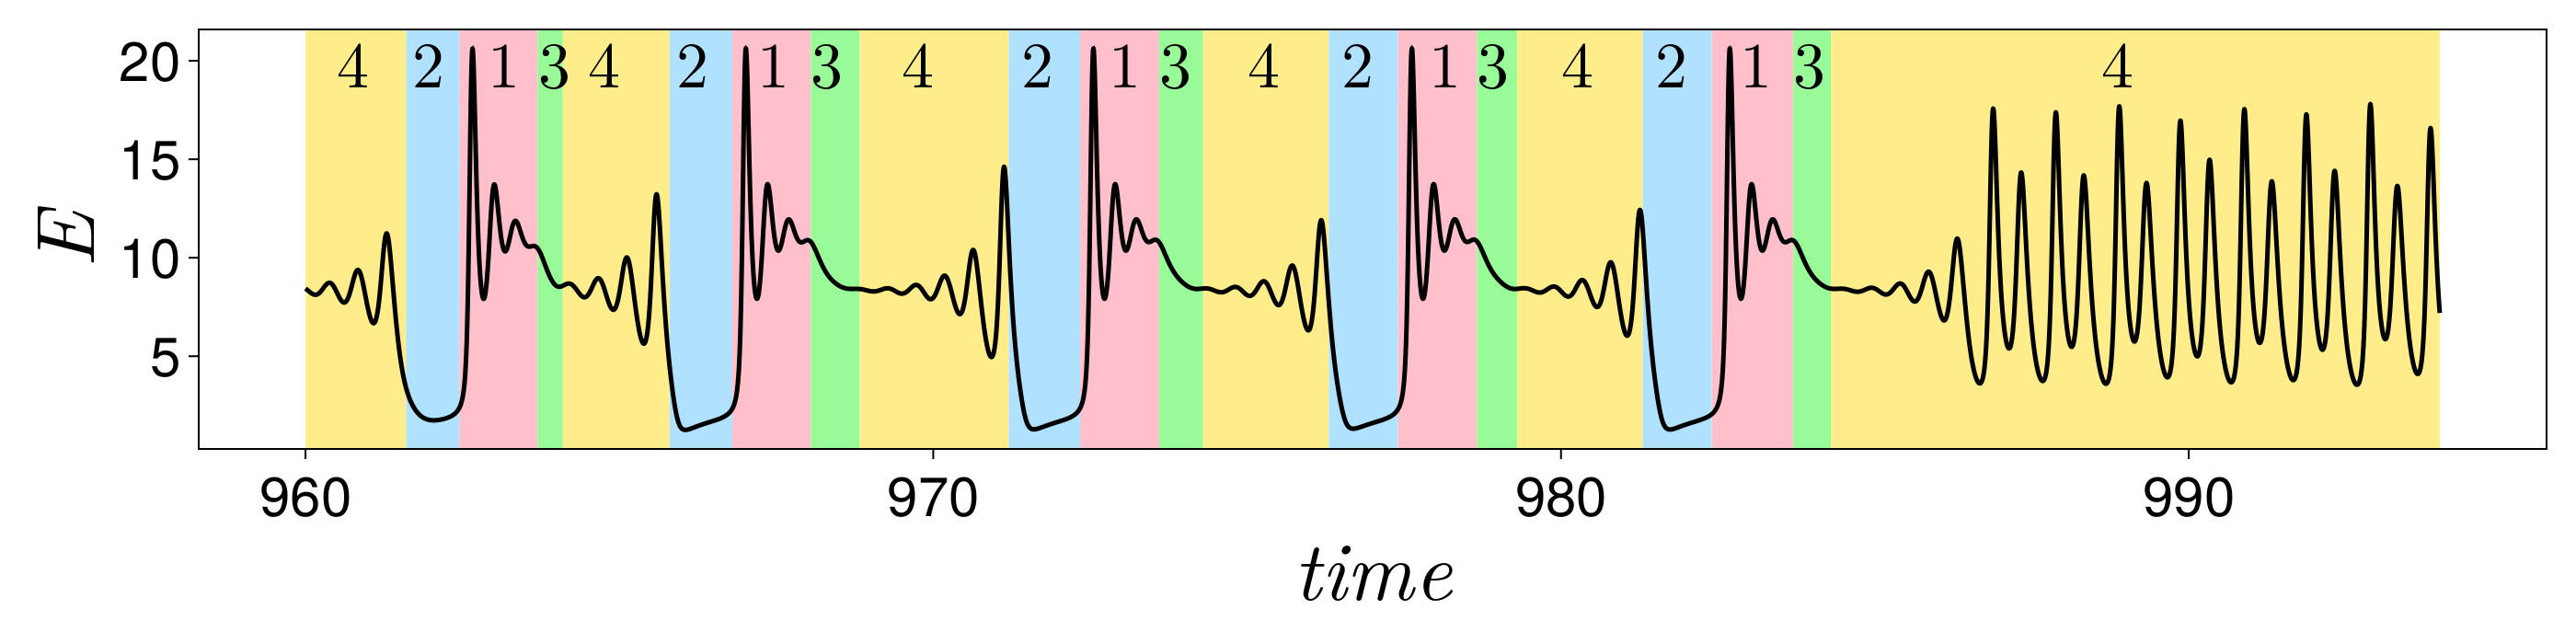

In [9]:
ts, tf = 960000, 994000 #165000, 200000 #500000, 580000
textsize = 35
hei = 18

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(size = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

#:thistle1)
# mistyrose

bluest = [961.60, 965.8, 971.2, 976.3, 981.3]
bluend = [962.45, 966.8, 972.34, 977.4, 982.4]

pinkst = [962.45, 966.8, 972.34, 977.4, 982.4]
pinkend = [963.7, 968.05, 973.6, 978.66, 983.7]

ph3st = [963.7, 968.05, 973.6, 978.66, 983.7]
ph3end = [964.1, 968.83, 974.3, 979.3, 984.3]

ph4st = [960, 964.1, 968.83, 974.3, 979.3, 984.3]
ph4end = [961.60, 965.8, 971.2, 976.3, 981.3, 994.0]

vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)
vspan!(ph3st, ph3end, color = :palegreen)#honeydew2)
vspan!(ph4st, ph4end, color = :lightgoldenrod1)


text!(axis, 961.7, hei,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 965.9, hei,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 971.4, hei,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 976.5, hei,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 981.5, hei,  text = L"2", fontsize = textsize, color = :black)


text!(axis, 960.5, hei,  text = L"4", fontsize = textsize, color = :black)
text!(axis, 964.5, hei,  text = L"4", fontsize = textsize, color = :black)
text!(axis, 969.5, hei,  text = L"4", fontsize = textsize, color = :black)
text!(axis, 975.0, hei,  text = L"4", fontsize = textsize, color = :black)
text!(axis, 980.0, hei,  text = L"4", fontsize = textsize, color = :black)
text!(axis, 988.6, hei,  text = L"4", fontsize = textsize, color = :black)


text!(axis, 962.9, hei,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 967.2, hei,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 972.8, hei,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 977.9, hei,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 982.85, hei,  text = L"1", fontsize = textsize, color = :black)

text!(axis, 963.7, hei,  text = L"3", fontsize = textsize, color = :black)
text!(axis, 968.05, hei,  text = L"3", fontsize = textsize, color = :black)
text!(axis, 973.6, hei,  text = L"3", fontsize = textsize, color = :black)
text!(axis, 978.66, hei,  text = L"3", fontsize = textsize, color = :black)
text!(axis, 983.7, hei,  text = L"3", fontsize = textsize, color = :black)

lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)
f

In [184]:
#save("chaotic_homoclinic_timeseries.eps", f)

CairoMakie.Screen{EPS}
